<a href="https://www.kaggle.com/code/prashantsparhad/day-27-one-hot-encoding-handling-categorical-data?scriptVersionId=101211482" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cars-dataset/cars.csv


In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("/kaggle/input/cars-dataset/cars.csv")

In [4]:
df.sample(5)

,brand,km_driven,fuel,owner,selling_price
6996,Chevrolet,80000,Diesel,First Owner,200000
364,Nissan,120000,Diesel,First Owner,250000
7363,Honda,18300,Petrol,First Owner,890000
4881,Maruti,80000,Petrol,Second Owner,240000
3545,Ford,90000,Petrol,Second Owner,160000


<AxesSubplot:>

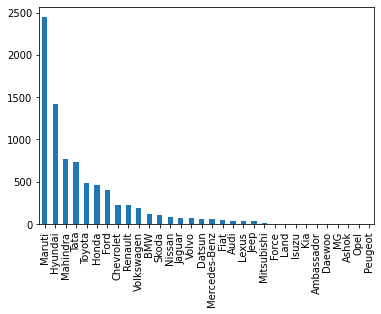

In [5]:
df["brand"].value_counts().plot.bar()

In [6]:
df["brand"].nunique()

32

<AxesSubplot:>

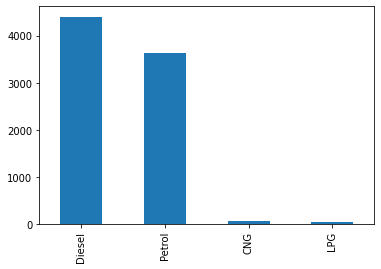

In [7]:
df["fuel"].value_counts().plot.bar()

<AxesSubplot:>

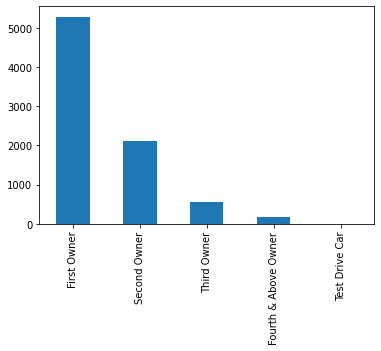

In [8]:
df["owner"].value_counts().plot.bar()

# 1. OneHotEncoding using Pandas

In [9]:
pd.get_dummies(df,columns=["fuel","owner"])

,brand,km_driven,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,0,1,0,0,1,0,0,0,0
1,Skoda,120000,370000,0,1,0,0,0,0,1,0,0
2,Honda,140000,158000,0,0,0,1,0,0,0,0,1
3,Hyundai,127000,225000,0,1,0,0,1,0,0,0,0
4,Maruti,120000,130000,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,0,0,0,1,1,0,0,0,0
8124,Hyundai,119000,135000,0,1,0,0,0,1,0,0,0
8125,Maruti,120000,382000,0,1,0,0,1,0,0,0,0
8126,Tata,25000,290000,0,1,0,0,1,0,0,0,0


# 2. K-1 OneHotEncoding

In [10]:
pd.get_dummies(df,columns=["fuel","owner"],drop_first=True)

,brand,km_driven,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,1,0,0,0,0,0,0
1,Skoda,120000,370000,1,0,0,0,1,0,0
2,Honda,140000,158000,0,0,1,0,0,0,1
3,Hyundai,127000,225000,1,0,0,0,0,0,0
4,Maruti,120000,130000,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,0,0,1,0,0,0,0
8124,Hyundai,119000,135000,1,0,0,1,0,0,0
8125,Maruti,120000,382000,1,0,0,0,0,0,0
8126,Tata,25000,290000,1,0,0,0,0,0,0


# 3. OneHotEncoding using Sklearn

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,0:4],df.iloc[:,-1],
                                              test_size=0.2,
                                              random_state=0)

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
ohe=OneHotEncoder()

In [14]:
ohe.fit_transform(X_train[["fuel",]])

<6502x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6502 stored elements in Compressed Sparse Row format>